**Midterm Project**

**dataset** - employee_departure_dataset https://drive.google.com/file/d/1XoEt8xC_HCOxofrmFC0Mu_W2oHnfOt9z/view?usp=drive_link

***Steps to be followed:***
1. EDA
2. Feature Engineering
3. Create multiple models
4. Perform cross validation
5. Create pipelines
6. Evaluate models
7. Hyperparameter selection/tuning

<h2> <b> Objective:<br></h2>
The main objective of the project is to identify the employees leaving the organization<br>
The primarily identifying the factors influencing the leaving the organisation<br>

<B> Importng required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>Loading the File and Understanding the data

In [ ]:
df = pd.read_csv("https://drive.google.com/file/d/1XoEt8xC_HCOxofrmFC0Mu_W2oHnfOt9z/view?usp=drive_link")
df

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,8,45,1,18,3,10,...,1,5,3,1,59K,60K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,73,5,7,5,19,...,7,9,3,7,61K,64K,4.0,4.0,2,0
2,2,1002334,0,<5mile,6,65,1,13,2,7,...,8,4,3,1,61K,63K,4.0,4.0,3,0
3,3,1002335,0,~15miles,7,18,4,14,3,3,...,3,4,4,5,58K,61K,5.0,5.0,7,0
4,4,1002336,1,~20miles,7,73,5,10,1,18,...,5,1,6,3,61K,62K,5.0,5.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,1302327,0,>30miles,6,32,5,13,3,5,...,8,8,5,2,56K,57K,4.0,5.0,2,1
299996,299996,1302328,1,~15miles,8,25,4,6,5,7,...,5,8,3,4,63K,65K,5.0,5.0,2,0
299997,299997,1302329,0,~20miles,6,91,4,18,5,1,...,7,8,3,6,60K,63K,4.0,5.0,6,0
299998,299998,1302330,0,<5mile,8,56,5,3,3,1,...,2,4,8,1,61K,63K,5.0,5.0,2,0


<h2> EDA

<B>Finding the Number of Columns and rows

In [ ]:
df.shape

<b>Clear Inspection

In [ ]:
df.head().T

In [ ]:
df.columns

<B> Getting the info about the data like datatypes, min and max values 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   300000 non-null  int64  
 1   Distance                 299734 non-null  float64
 2   YearsWorked              300000 non-null  int64  
 3   TrainingHours            300000 non-null  int64  
 4   NumOfProjects            300000 non-null  int64  
 5   JobInvolvement           300000 non-null  int64  
 6   TeamSize                 300000 non-null  int64  
 7   MentorshipReceived       300000 non-null  int64  
 8   TechSkillLevel           300000 non-null  int64  
 9   AttendanceRate           300000 non-null  float64
 10  StressLevel              300000 non-null  int64  
 11  PeerFeedbackScore        300000 non-null  int64  
 12  Dependents               300000 non-null  int64  
 13  Certifications           300000 non-null  int64  
 14  Onsi

<B> There is no use of these Columns 

In [3]:
df = df.drop(['Unnamed: 0', 'RecordId'], axis=1)

In [4]:
df.describe()

,Gender,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,AttendanceRate,...,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,SelfReview,SupervisorReview,DepartmentCode,Left
count,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,299404.000000,299423.000000,300000.000000,300000.000000
mean,0.401043,6.999463,49.56185,2.997280,10.016793,3.001797,9.999680,0.498273,2.998253,89.996077,...,0.500643,3.002780,4.994403,4.997240,4.996777,4.996520,4.399093,4.101412,3.997480,0.309633
std,0.490111,1.871401,28.81723,1.414951,5.484806,1.413865,5.472419,0.499998,1.413533,5.773993,...,0.500000,1.413166,2.579983,2.578817,2.582293,2.582018,0.663333,0.943855,2.161085,0.462343
min,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000075,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000
25%,0.000000,6.000000,25.00000,2.000000,5.000000,2.000000,5.000000,0.000000,2.000000,84.986555,...,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,0.000000
50%,0.000000,7.000000,50.00000,3.000000,10.000000,3.000000,10.000000,0.000000,3.000000,89.988180,...,1.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.000000
75%,1.000000,8.000000,75.00000,4.000000,15.000000,4.000000,15.000000,1.000000,4.000000,95.003488,...,1.000000,4.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,6.000000,1.000000
max,1.000000,14.000000,99.00000,5.000000,19.000000,5.000000,19.000000,1.000000,5.000000,99.999999,...,1.000000,5.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,7.000000,1.000000


<b>Finding the Balance of target feature 

In [5]:
df["Left"].value_counts()

Left
0    207110
1     92890
Name: count, dtype: int64

<h2> Visualizing the Data 

Text(0, 0.5, 'Employee count')

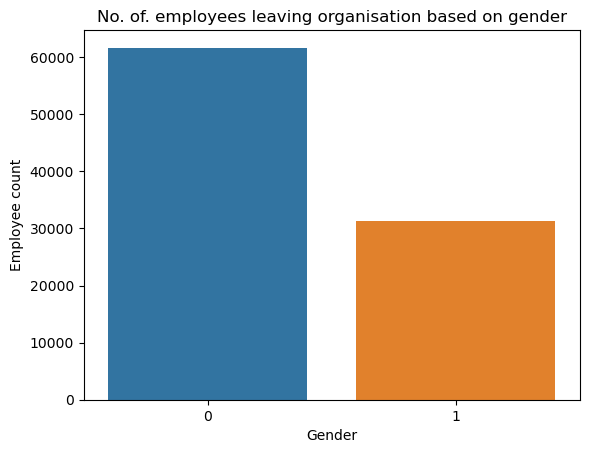

In [6]:
left_df = df[df["Left"]==1]
sns.countplot(data=left_df,x="Gender")
plt.title("No. of. employees leaving organisation based on gender")
plt.xlabel("Gender")
plt.ylabel("Employee count")

Text(0.5, 1.0, 'Distribution of Years Worked for Employees Who Left')

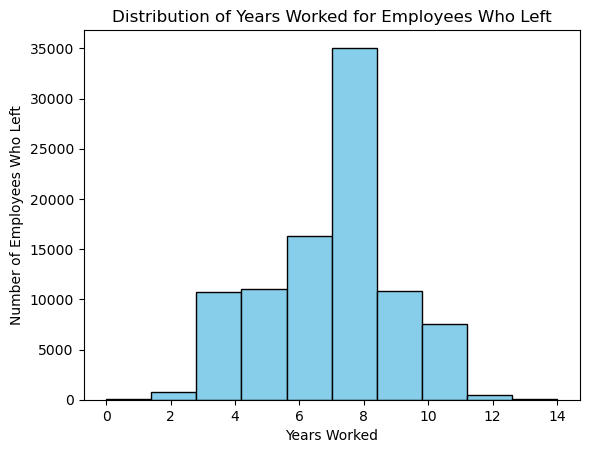

In [7]:
plt.hist(left_df["YearsWorked"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Years Worked")
plt.ylabel("Number of Employees Who Left")
plt.title("Distribution of Years Worked for Employees Who Left")

<Axes: xlabel='TrainingHours', ylabel='Certifications'>

C:\Users\seenu\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\seenu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


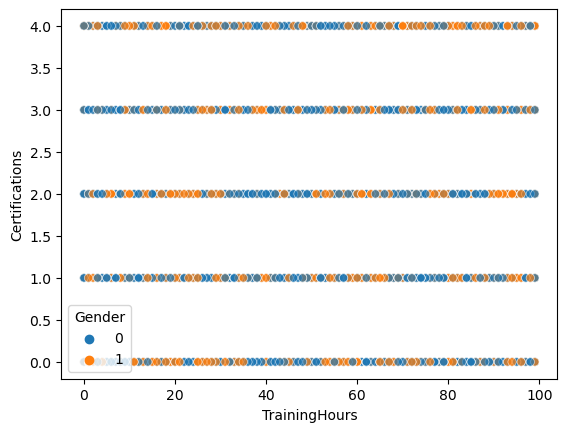

In [8]:
sns.scatterplot(data=df, x="TrainingHours", y="Certifications", hue="Gender", alpha=0.7)


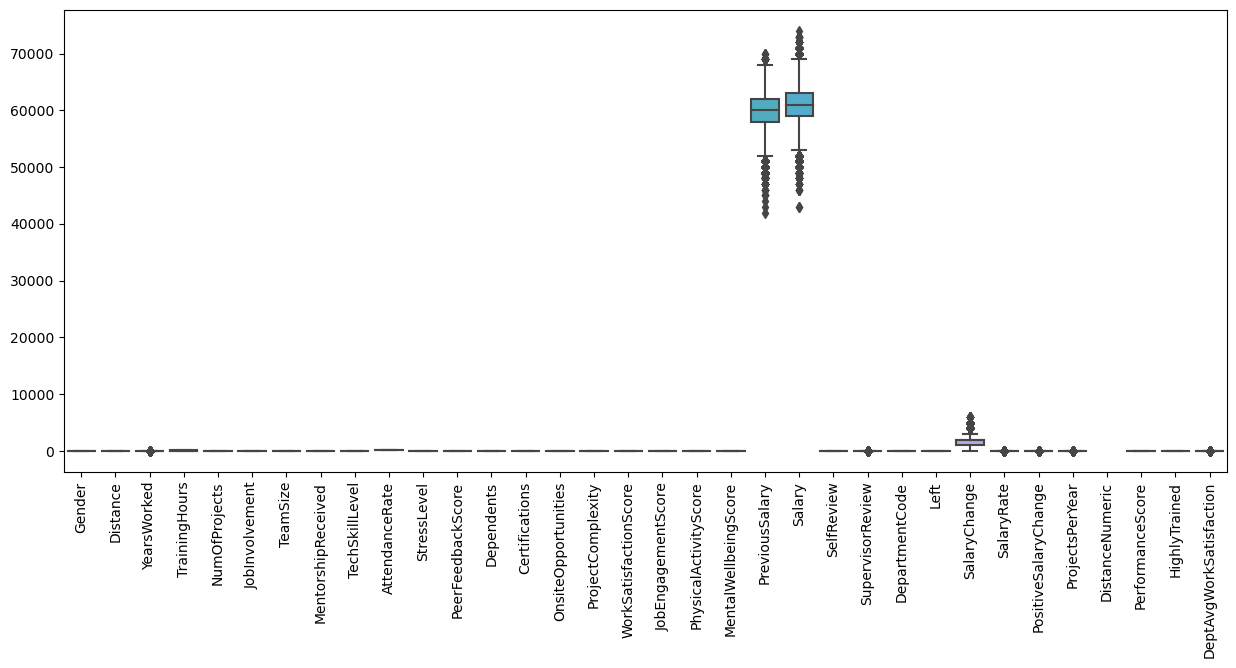

In [47]:

plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Computing the Distance feature

In [9]:
df['Distance'] = df['Distance'].str.replace(r'[^\d.]', '', regex=True)
df['Distance'] = df['Distance'].str.replace('miles', '')
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

print(df)

        Gender  Distance  YearsWorked  TrainingHours  WorkLifeBalance  \
0            1      30.0            8             45                1   
1            0      10.0            7             73                5   
2            0       5.0            6             65                1   
3            0      15.0            7             18                4   
4            1      20.0            7             73                5   
...        ...       ...          ...            ...              ...   
299995       0      30.0            6             32                5   
299996       1      15.0            8             25                4   
299997       0      20.0            6             91                4   
299998       0       5.0            8             56                5   
299999       0      20.0            8             79                2   

        NumOfProjects  JobInvolvement  TeamSize  MentorshipReceived  \
0                  18               3        10     

In [10]:
df['Distance']

0         30.0
1         10.0
2          5.0
3         15.0
4         20.0
          ... 
299995    30.0
299996    15.0
299997    20.0
299998     5.0
299999    20.0
Name: Distance, Length: 300000, dtype: float64

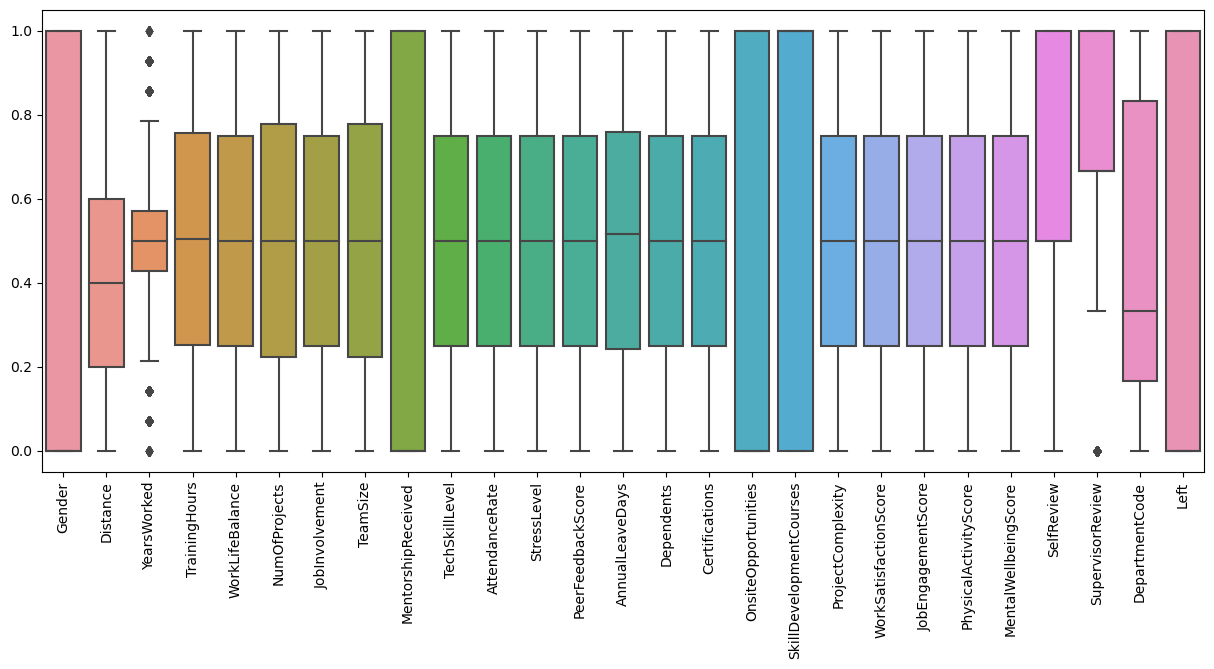

In [5]:

from sklearn.preprocessing import MinMaxScaler

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<B>Separating the numerical columns and categorical columns 

In [11]:
numeric_columns = df.select_dtypes(include=['int', 'float'])

<b>This heat map will gives the correlation left column and others 

<Axes: >

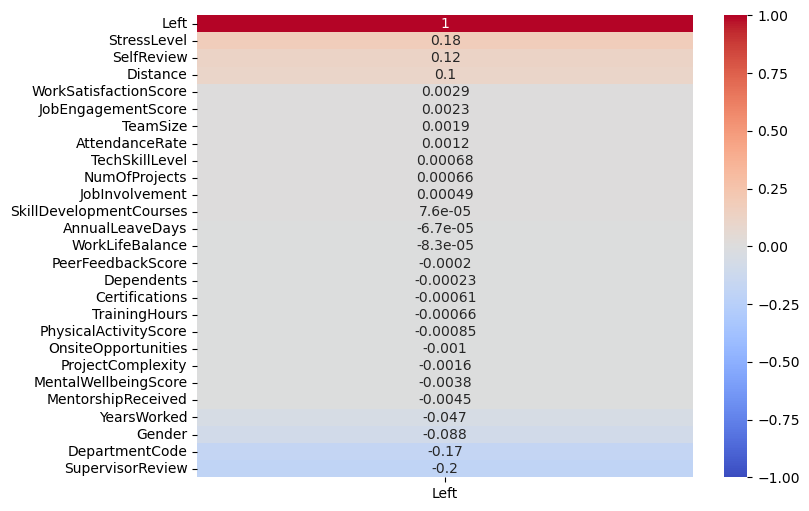

In [12]:
correlations = numeric_columns.corr()[["Left"]].sort_values(by="Left", ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

<b> Based on correlation heat map I am dropping the least correlated columns 

In [13]:
df = df.drop(['SkillDevelopmentCourses', 'AnnualLeaveDays', 'WorkLifeBalance'], axis=1)

<h2> Feature engineering

<b>Converting the salary (in Ks) to integers 

In [14]:
df['Salary'] = df['Salary'].str.replace('K', '', regex=False).astype(int) * 1000

In [15]:
df['PreviousSalary'] = df['PreviousSalary'].str.replace('K', '', regex=False).astype(int) * 1000

In [21]:
df['Salary']

0         60000
1         64000
2         63000
3         61000
4         62000
          ...  
299995    57000
299996    65000
299997    63000
299998    63000
299999    60000
Name: Salary, Length: 300000, dtype: int32

<b>Change in salary

In [16]:
df['SalaryChange'] = df["Salary"] - df["PreviousSalary"]

In [27]:
df["SalaryChange"]

0         1000
1         3000
2         2000
3         3000
4         1000
          ... 
299995    1000
299996    2000
299997    3000
299998    2000
299999    2000
Name: SalaryChange, Length: 300000, dtype: int32

<b> Rate of change of salary

In [17]:
df["SalaryRate"] = df["SalaryChange"]/ df["PreviousSalary"]

Seperating the increments from decrements

In [18]:
df["PositiveSalaryChange"] = np.where(df["SalaryChange"] > 0, 1, 0)

<b>inspecting the derived columns

In [29]:
df.head().T

,0,1,2,3,4
Gender,1.000000,0.00000,0.000000,0.000000,1.000000
Distance,30.000000,10.00000,5.000000,15.000000,20.000000
YearsWorked,8.000000,7.00000,6.000000,7.000000,7.000000
TrainingHours,45.000000,73.00000,65.000000,18.000000,73.000000
WorkLifeBalance,1.000000,5.00000,1.000000,4.000000,5.000000
NumOfProjects,18.000000,7.00000,13.000000,14.000000,10.000000
JobInvolvement,3.000000,5.00000,2.000000,3.000000,1.000000
TeamSize,10.000000,19.00000,7.000000,3.000000,18.000000
MentorshipReceived,0.000000,0.00000,0.000000,0.000000,0.000000
TechSkillLevel,4.000000,4.00000,1.000000,3.000000,4.000000


Calucating the Average number of projects completed in a year

In [19]:
df["ProjectsPerYear"] = df["NumOfProjects"] / df["YearsWorked"]

<b>Performance Score

In [21]:
df["PerformanceScore"] = (df["AttendanceRate"] + df["PeerFeedbackScore"] + df["SelfReview"] + df["SupervisorReview"]) / 4


<b>Finding out highly trained employees

In [22]:
df["HighlyTrained"] = np.where(df["TrainingHours"]>50,1,0)

Average work satisfaction based on department

In [24]:
df["DeptAvgWorkSatisfaction"] = df.groupby("DepartmentCode")["WorkSatisfactionScore"].transform("mean")


In [25]:
df["DeptAvgWorkSatisfaction"]

0         4.995438
1         4.995438
2         4.988315
3         4.986505
4         5.011087
            ...   
299995    4.995438
299996    4.995438
299997    4.990588
299998    4.995438
299999    4.986505
Name: DeptAvgWorkSatisfaction, Length: 300000, dtype: float64

In [26]:
df['Left']

0         0
1         0
2         0
3         0
4         0
         ..
299995    1
299996    0
299997    0
299998    0
299999    0
Name: Left, Length: 300000, dtype: int64

In [27]:
print(df['Left'].isnull().sum())

0


## Choosing the Right Metric
- Recall: Indicates how well the model identifies employees who are actually leaving.
- Precision: Shows how accurately the model flags employees as leaving when they are actually staying.

<b>Between the two, we prioritize recall over precision due to the business impact of incorrectly predicting an employee as staying when they are actually planning to leave.</b>


### Using KNN model

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.impute import SimpleImputer

X = df.drop('Left', axis=1)
y = df['Left']

X = X.replace([np.inf, -np.inf], np.nan)

X = X.apply(lambda col: col.fillna(0) if col.isnull().all() else col)

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

model = KNeighborsClassifier(n_neighbors=50)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.7725444444444445
Recall: 0.479050730621477
Precision: 0.6912038955656858


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,  
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy of best model: {accuracy}")
print(f"Recall of best model: {recall}")
print(f"Precision of best model: {precision}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Accuracy of best model: 0.7968888888888889
Recall of best model: 0.5396905180770474
Precision of best model: 0.7335903567419843


In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score
from sklearn.impute import SimpleImputer

X = df.drop('Left', axis=1)
y = df['Left']

X = pd.get_dummies(X, drop_first=True)

X.replace([np.inf, -np.inf], np.nan, inplace=True)

imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)

model = KNeighborsClassifier(n_neighbors=50)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, n_jobs=-1)

print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Mean Recall: {np.mean(cv_results['test_recall'])}")
print(f"Mean Precision: {np.mean(cv_results['test_precision'])}")

Mean Accuracy: 0.8129666666666667
Mean Recall: 0.5459846460629402
Mean Precision: 0.7844543319628733


### Inference:
#### The KNN model has a low recall of 54%, which makes it less suitable for our objective of accurately identifying potential leavers

## Testing with Random Forest

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd

X = df.drop('Left', axis=1)
y = df['Left']

X = X.replace([np.inf, -np.inf], np.nan)

X = X.apply(lambda col: col.fillna(0) if col.isnull().all() else col)

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.8832333333333333
Recall: 0.9106738950920906
Precision: 0.7597495956388906


#### GridSearch on Random Forest Model

In [29]:
df1=df[:50000]

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score

X = df1.drop('Left', axis=1)
y = df1['Left']
X = X.replace([np.inf, -np.inf], np.nan)

X = X.apply(lambda col: col.fillna(0) if col.isnull().all() else col)

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,  
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy of the best model: {accuracy}")
print(f"Recall of the best model: {recall}")
print(f"Precision of the best model: {precision}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy of the best model: 0.8764
Recall of the best model: 0.8644910309055543
Precision of the best model: 0.7652573177731012


In [36]:
X = df.drop('Left', axis=1)
y = df['Left']

In [44]:
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

X = df.drop('Left', axis=1)
y = df['Left']

X = X.replace([np.inf, -np.inf], np.nan)

X = X.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, 
                               min_samples_split=2, n_estimators=500, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

cv_results = cross_validate(model, X_imputed, y, cv=kf, scoring=scoring, n_jobs=-1)

print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Mean Recall: {np.mean(cv_results['test_recall'])}")
print(f"Mean Precision: {np.mean(cv_results['test_precision'])}")

Mean Accuracy: 0.8839600000000001
Mean Recall: 0.9117626524841583
Mean Precision: 0.7608988431904251


Confusion Matrix:
[[54215  7932]
 [ 2589 25264]]


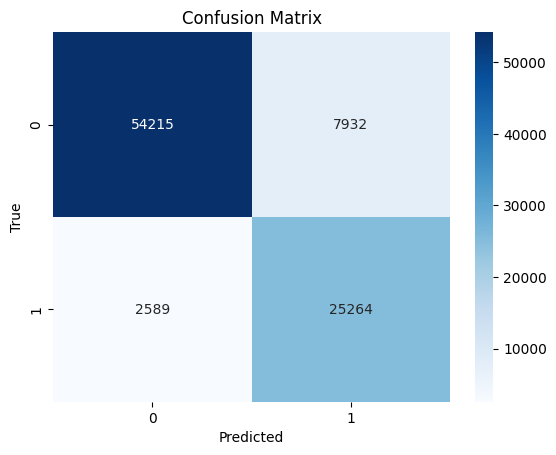

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Inference:
- The model's high recall suggests that it has a lower rate of missing an employee who is about to leave
- The model's lower precision suggests that it can predict some employees as leaving when they are not

## Testing with DecisionTree

In [36]:
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

X = X.replace([np.inf, -np.inf], np.nan)

X = X.apply(lambda col: col.fillna(0) if col.isnull().all() else col)

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


Accuracy: 0.8481333333333333
Recall: 0.7415000179513876
Precision: 0.7615132185391394


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  
    scoring='recall',
    n_jobs=-1, 
    verbose=2  
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of best model:", accuracy)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of best model: 0.8848333333333334


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, classification_report
import numpy as np

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('model', DecisionTreeClassifier(criterion='entropy', max_depth=10, 
                                     min_samples_leaf=1, min_samples_split=2, 
                                     random_state=42))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, zero_division=1),
    'precision': make_scorer(precision_score, zero_division=1)
}

cv_results = cross_validate(pipeline, X, y, cv=kf, scoring=scoring, n_jobs=-1)

print("K-Fold cross-validation results (mean scores):")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Mean Recall: {np.mean(cv_results['test_recall'])}")
print(f"Mean Precision: {np.mean(cv_results['test_precision'])}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

K-Fold cross-validation results (mean scores):
Mean Accuracy: 0.8838099999999999
Mean Recall: 0.9462376692400032
Mean Precision: 0.7464127840566885

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     62147
           1       0.75      0.95      0.84     27853

    accuracy                           0.88     90000
   macro avg       0.86      0.90      0.87     90000
weighted avg       0.90      0.88      0.89     90000



Confusion Matrix:
[[55604  6543]
 [ 7123 20730]]


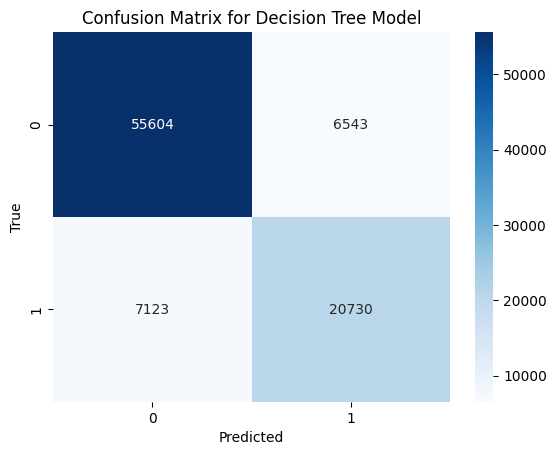

In [ ]:

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

### Inference:
#### The model demonstrates a strong balance between precision and recall, with especially high recall for identifying employees likely to leave.

### Best Model ?

##### Among the three models tested (Random Forest, Decision Tree, and KNN), the Decision Tree model (with parameters 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2) performs the best based on:

##### - Highest Recall (94.6%): This model effectively captures nearly all employees who are actually leaving, which is crucial for our objective.
##### - Balanced Performance: It maintains a reasonable precision (74.6%) and F1-score for the "leaving" class, making it reliable without too many false alarms.
##### - Consistent Accuracy: With a mean accuracy of 88.4%, it performs consistently well across different folds in K-Fold Cross-Validation, indicating good generalization.

##### Overall, the Decision Tree model’s high recall and balanced metrics make it the most suitable model for predicting employee turnover, aligning well with the business goal of identifying potential leavers accurately.